<a href="https://colab.research.google.com/github/vkumar61/MAT421/blob/main/Module_G_Section_21_4_21_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simpson's Rule

Continuing with the same theme as the last section we are simply trying to approximate areas under a given curve to approximate finite integrals. Last time we ended on a first order/linear approximation of the curves behavior between any two datapoints, but, barring computational limits there's nothing stopping us from doing higher order approximations. The logical next step is a quadratic that approximates the behavior of our function, the basis for Simpson's Rule. To uniquely define a quadratic we need 3 datapoints, but this can easily be overcome by subsetting the given data into groups of three with 1 datapoint overlap in each sub interval. To derive Simpson's rule, we start by considering Taylor series expansions of $ f(x) $ at points $ x_{i-1} $ and $ x_{i+1} $, which are neighboring points around $ x_i $. Let's denote the interval width as $ h $.

The Taylor series expansions are:

$$
\begin{align*}
f(x_{i-1}) &= f(x_i) - h f'(x_i) + \frac{h^2}{2!} f''(x_i) - \frac{h^3}{3!} f'''(x_i) + \cdots \\
f(x_{i+1}) &= f(x_i) + h f'(x_i) + \frac{h^2}{2!} f''(x_i) + \frac{h^3}{3!} f'''(x_i) + \cdots
\end{align*}
$$

Now, let's consider the expression $ \frac{f(x_{i-1}) + 4f(x_i) + f(x_{i+1})}{6} $, which is the core of Simpson's rule. Substituting the Taylor series for $ f(x_{i-1}) $ and $ f(x_{i+1}) $ gives:

$$
\frac{f(x_{i-1}) + 4f(x_i) + f(x_{i+1})}{6} = f(x_i) + \frac{h^2}{6} f''(x_i) + O(h^4)
$$

Here, the odd terms cancel out, leaving us with only the terms related to the second derivative.

By integrating this expression over the interval $ [x_{i-1}, x_{i+1}] $, we can approximate the integral of $ f(x) $ over this interval. The integral of $ f(x_i) $ is straightforward, and the integral of the term involving the second derivative can be computed exactly, resulting in:

$$
\int_{x_{i-1}}^{x_{i+1}} f(x) \, dx = \frac{h}{3}(f(x_{i-1}) + 4f(x_i) + f(x_{i+1})) + O(h^5)
$$

Now we sum up these approximations over all subintervals and divide the interval $ [a, b] $ into $ n $ subintervals. This results in:

$$
\int_{a}^{b} f(x) \, dx \approx \frac{h}{3} \left( f(x_0) + 4 \sum_{i=1}^{n/2} f(x_{2i-1}) + 2 \sum_{i=1}^{n/2-1} f(x_{2i}) + f(x_n) \right)
$$


Now we apply Simpson's Rule to the same function that we did in the last section:

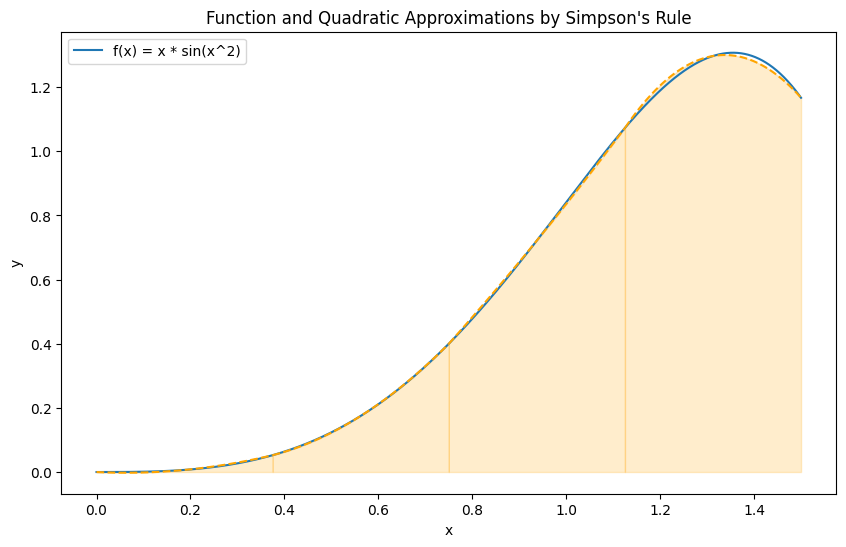

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * np.sin(x**2)

a = 0
b = 1.5
n = 9

dx = (b - a) / (n-1)

exact_integral = (1 - np.cos(4)) / 2

# Create arrays for plotting
x_values = np.linspace(a, b, n)  # Using int() to convert dx to an integer
y_values = f(x_values)

x_fine = np.linspace(a, b, 10000)
y_fine = f(x_fine)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x_fine, y_fine, label='f(x) = x * sin(x^2)')

# Plot the quadratic approximations
for i in range(0, len(x_values) - 2, 2):
    # Pick three consecutive points
    x_segment = x_values[i:i+3]
    y_segment = y_values[i:i+3]

    # Fit a quadratic curve
    coeffs = np.polyfit(x_segment, y_segment, 2)
    quadratic = np.poly1d(coeffs)

    # Plot the quadratic curve on a finer grid
    x_finer = np.linspace(x_segment[0], x_segment[-1], 100)
    plt.plot(x_finer, quadratic(x_finer), color='orange', linestyle='--', alpha=1)
    plt.fill_between(x_finer, quadratic(x_finer), color='orange', alpha=0.2)

plt.title('Function and Quadratic Approximations by Simpson\'s Rule')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [2]:
# Compute the integral using Simpson's Rule
integral = (dx/3) * (y_values[0] + 4*np.sum(y_values[1:n-1:2]) + 2*np.sum(y_values[2:n-2:2]) + y_values[-1])

# Calculate the error
error = abs(exact_integral - integral)

print(f"Exact integral: {exact_integral}")
print(f"Approximation of the integral: {integral}")
print(f"Error: {error}")

Exact integral: 0.8268218104318059
Approximation of the integral: 0.8138698358831491
Error: 0.01295197454865682
